**Brief description of the project:**

In the following work We tried to build a classifier that was able to distinguish a healthy patient from a sick one based on his brain MRI (-> binary classification)

The medical images We have analyzed represent slices of the brain from the axial point of view, some are images of healthy brains, others images of brains with brain tumors.



# HISTORY

#### Abstract
* A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
* Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using Convolution-Neural Network (CNN), Artificial Neural Network (ANN), and Transfer-Learning (TL) would be helpful to doctors all around the world.

#### Context
* Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem.

#### Definition
* To Detect and Classify Brain Tumor using, CNN or ANN; as an asset of Deep Learning and to examine the tumor position(segmentation).

#### About the data:
* The dataset contains 3 folders: yes, no and pred which contains 3060 Brain MRI Images.

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# PACKAGES AND LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
# from tensorflow.keras.applications import convnext
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
'''from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50 ,decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential'''

'from tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom keras.applications import ResNet50 ,decode_predictions\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.models import Sequential'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PATH PROCESS

#### TRAIN

In [ ]:
No_Data_Path = Path("../content/drive/MyDrive/archive/no")
Yes_Data_Path = Path("../content/drive/MyDrive/archive/yes")

In [ ]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [ ]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('../content/drive/MyDrive/archive/no/no1356.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no1413.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no264.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no238.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no1397.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('../content/drive/MyDrive/archive/yes/y1317.jpg'), PosixPath('../content/drive/MyDrive/archive/yes/y1449.jpg'), PosixPath('../content/drive/MyDrive/archive/yes/y1499.jpg'), PosixPath('../content/drive/MyDrive/archive/yes/y1319.jpg'), PosixPath('../content/drive/MyDrive/archive/yes/y11.jpg')]


In [ ]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [ ]:
print(Yes_No_List[0:10])

[PosixPath('../content/drive/MyDrive/archive/no/no1356.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no1413.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no264.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no238.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no1397.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no208.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no25.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no1321.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no1079.jpg'), PosixPath('../content/drive/MyDrive/archive/no/no16.jpg')]


In [ ]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [ ]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [ ]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [ ]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [ ]:
print(Main_Train_Data.head(-1))

                                                 JPG TUMOR_CATEGORY
0     ../content/drive/MyDrive/archive/no/no1356.jpg             no
1     ../content/drive/MyDrive/archive/no/no1413.jpg             no
2      ../content/drive/MyDrive/archive/no/no264.jpg             no
3      ../content/drive/MyDrive/archive/no/no238.jpg             no
4     ../content/drive/MyDrive/archive/no/no1397.jpg             no
...                                              ...            ...
2994  ../content/drive/MyDrive/archive/yes/y1427.jpg            yes
2995    ../content/drive/MyDrive/archive/yes/y19.jpg            yes
2996  ../content/drive/MyDrive/archive/yes/y1351.jpg            yes
2997  ../content/drive/MyDrive/archive/yes/y1433.jpg            yes
2998  ../content/drive/MyDrive/archive/yes/y1082.jpg            yes

[2999 rows x 2 columns]


#### TEST

In [ ]:
Prediction_Path = Path("../content/drive/MyDrive/archive/pred")

In [ ]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [ ]:
print(Test_JPG_Path[0:5])

[PosixPath('../content/drive/MyDrive/archive/pred/pred36.jpg'), PosixPath('../content/drive/MyDrive/archive/pred/pred17.jpg'), PosixPath('../content/drive/MyDrive/archive/pred/pred41.jpg'), PosixPath('../content/drive/MyDrive/archive/pred/pred14.jpg'), PosixPath('../content/drive/MyDrive/archive/pred/pred28.jpg')]


In [ ]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [ ]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [ ]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [ ]:
print(Test_Data.head())

                                                JPG TUMOR_CATEGORY
0  ../content/drive/MyDrive/archive/pred/pred36.jpg           pred
1  ../content/drive/MyDrive/archive/pred/pred17.jpg           pred
2  ../content/drive/MyDrive/archive/pred/pred41.jpg           pred
3  ../content/drive/MyDrive/archive/pred/pred14.jpg           pred
4  ../content/drive/MyDrive/archive/pred/pred28.jpg           pred


# SHUFFLING

In [ ]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Train_Data.head(-1))

                                                 JPG TUMOR_CATEGORY
0     ../content/drive/MyDrive/archive/yes/y1038.jpg            yes
1     ../content/drive/MyDrive/archive/yes/y1000.jpg            yes
2      ../content/drive/MyDrive/archive/no/no976.jpg             no
3      ../content/drive/MyDrive/archive/yes/y633.jpg            yes
4      ../content/drive/MyDrive/archive/no/no333.jpg             no
...                                              ...            ...
2994   ../content/drive/MyDrive/archive/no/no616.jpg             no
2995  ../content/drive/MyDrive/archive/yes/y1366.jpg            yes
2996  ../content/drive/MyDrive/archive/yes/y1393.jpg            yes
2997   ../content/drive/MyDrive/archive/yes/y971.jpg            yes
2998   ../content/drive/MyDrive/archive/no/no852.jpg             no

[2999 rows x 2 columns]


# VISUALIZATION

Text(0.5, 1.0, 'yes')

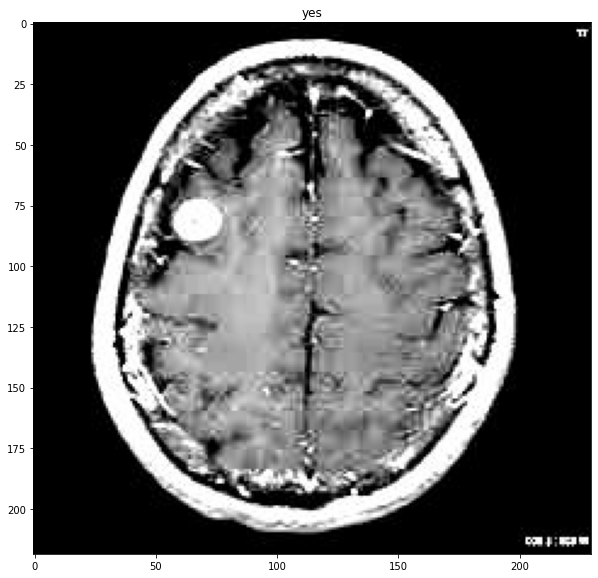

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'yes')

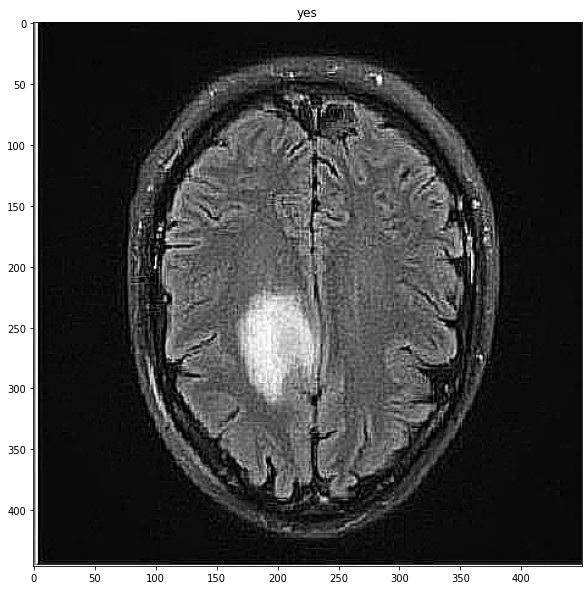

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

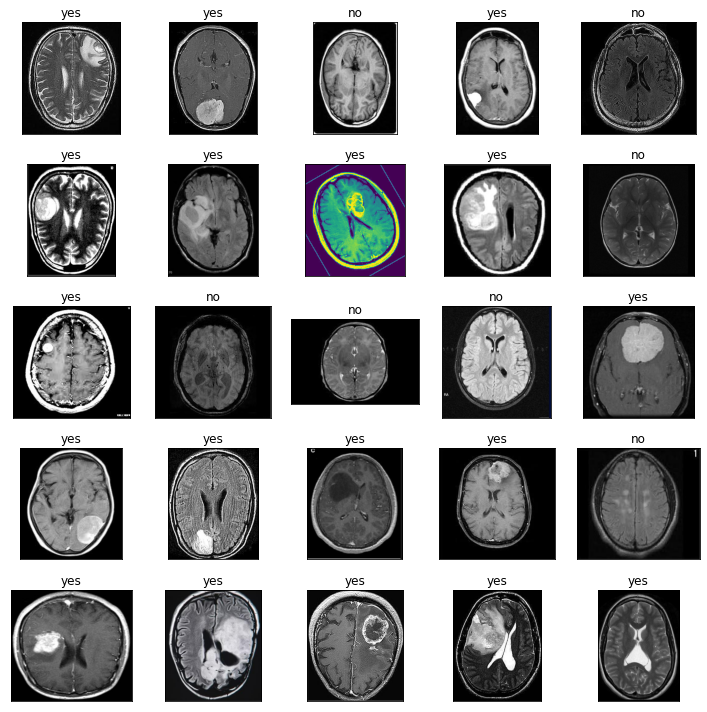

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

# MODEL TRAINING DATA

In [ ]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [ ]:
print(train_data.shape)

(2700, 2)


In [ ]:
print(train_data.head())

                                                 JPG TUMOR_CATEGORY
433   ../content/drive/MyDrive/archive/yes/y1345.jpg            yes
1151   ../content/drive/MyDrive/archive/yes/y556.jpg            yes
73     ../content/drive/MyDrive/archive/no/no871.jpg             no
1536   ../content/drive/MyDrive/archive/yes/y235.jpg            yes
2709   ../content/drive/MyDrive/archive/yes/y593.jpg            yes


In [ ]:
print(test_data.shape)

(300, 2)


In [ ]:
print(test_data.head())

                                                 JPG TUMOR_CATEGORY
1801   ../content/drive/MyDrive/archive/yes/y326.jpg            yes
1190  ../content/drive/MyDrive/archive/no/no1205.jpg             no
1817  ../content/drive/MyDrive/archive/yes/y1421.jpg            yes
251    ../content/drive/MyDrive/archive/yes/y917.jpg            yes
2505   ../content/drive/MyDrive/archive/yes/y884.jpg            yes


# IMAGE DATA GENERATOR WITHOUT DIVERSIFICATION

#### BASED ON TRAIN DATA

In [ ]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [ ]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [ ]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [ ]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


#### CHECKING

In [ ]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 1, 0, 0, 0]
(200, 200, 1)


In [ ]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 0, 1, 1]
(200, 200, 1)


In [ ]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 1, 1, 1]
(200, 200, 1)


In [ ]:
with tf.device("/gpu:0"):
        def gsmodel(unit, learning_rate):
                mymodel = Sequential()

                pretrained_model= tf.keras.applications.VGG19(
                    include_top=True,
                    weights="imagenet",
                    input_tensor=None,
                    input_shape=None,
                    pooling=None,
                    classes=1000,
                    classifier_activation="softmax",)

                for layer in pretrained_model.layers:
                        layer.trainable=False

                mymodel.add(pretrained_model)
                mymodel.add(Flatten())
                mymodel.add(Dense(512, activation='relu'))
                mymodel.add(Dense(1, activation='sigmoid'))
                mymodel.summary()
                mymodel.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
                return mymodel


In [ ]:
with tf.device("/gpu:0"):
        def gsmodel(unit, learning_rate):
                mymodel = Sequential()

                pretrained_model= tf.keras.applications.ResNet152V2(
                    include_top=True,
                    weights="imagenet",
                    input_tensor=None,
                    input_shape=None,
                    pooling=None,
                    classes=1000,
                    classifier_activation="softmax",)

                for layer in pretrained_model.layers:
                        layer.trainable=False

                mymodel.add(pretrained_model)
                mymodel.add(Flatten())
                mymodel.add(Dense(512, activation='relu'))
                mymodel.add(Dense(1, activation='sigmoid'))
                mymodel.summary()
                mymodel.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
                return mymodel



In [ ]:
with tf.device("/gpu:0"):
        def gsmodel(unit, learning_rate):
                mymodel = Sequential()

                pretrained_model= tf.keras.applications.InceptionResNetV2(
                    include_top=True,
                    weights="imagenet",
                    input_tensor=None,
                    input_shape=None,
                    pooling=None,
                    classes=1000,
                    classifier_activation="softmax",)

                for layer in pretrained_model.layers:
                        layer.trainable=False

                mymodel.add(pretrained_model)
                mymodel.add(Flatten())
                mymodel.add(Dense(512, activation='relu'))
                mymodel.add(Dense(1, activation='sigmoid'))
                mymodel.summary()
                mymodel.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
                return mymodel


In [ ]:
'''tf.keras.applications.ConvNeXtBase(
    model_name="convnext_base",
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)'''

'tf.keras.applications.ConvNeXtBase(\n    model_name="convnext_base",\n    include_top=True,\n    include_preprocessing=True,\n    weights="imagenet",\n    input_tensor=None,\n    input_shape=None,\n    pooling=None,\n    classes=1000,\n    classifier_activation="softmax",\n)'

In [ ]:
'''tf.keras.applications.ConvNeXtLarge(
    model_name="convnext_large",
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)'''

'tf.keras.applications.ConvNeXtLarge(\n    model_name="convnext_large",\n    include_top=True,\n    include_preprocessing=True,\n    weights="imagenet",\n    input_tensor=None,\n    input_shape=None,\n    pooling=None,\n    classes=1000,\n    classifier_activation="softmax",\n)'

In [ ]:
'''tf.keras.applications.ConvNeXtSmall(
    model_name="convnext_small",
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)'''

'tf.keras.applications.ConvNeXtSmall(\n    model_name="convnext_small",\n    include_top=True,\n    include_preprocessing=True,\n    weights="imagenet",\n    input_tensor=None,\n    input_shape=None,\n    pooling=None,\n    classes=1000,\n    classifier_activation="softmax",\n)'

# CNN MODEL FOR NON-DIVERSIFICATION

#### MODEL STRUCTURE

In [ ]:
'''Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))'''

'Model = Sequential()\n\nModel.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))\nModel.add(MaxPool2D((2,2)))\nModel.add(Dropout(0.2))\n#\nModel.add(Conv2D(64,(3,3),activation="relu"))\nModel.add(MaxPool2D((2,2)))\nModel.add(Dropout(0.2))\n#\nModel.add(Conv2D(128,(3,3),activation="relu"))\nModel.add(MaxPool2D((2,2)))\nModel.add(Dropout(0.2))\n#\nModel.add(Conv2D(256,(3,3),activation="relu"))\nModel.add(MaxPool2D((2,2)))\nModel.add(Dropout(0.2))\n#\nModel.add(Flatten())\nModel.add(Dropout(0.5))\nModel.add(Dense(512,activation="relu"))\nModel.add(Dense(2,activation="softmax"))'

#### MODEL COMPILE

In [ ]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#### MODEL FITTING

In [ ]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)

Epoch 1/30
120/120 [==============================] - 16s 130ms/step - loss: 0.1121 - accuracy: 0.9703 - val_loss: 0.0904 - val_accuracy: 0.9815
Epoch 2/30
120/120 [==============================] - 13s 104ms/step - loss: 0.0865 - accuracy: 0.9745 - val_loss: 0.0810 - val_accuracy: 0.9593
Epoch 3/30
120/120 [==============================] - 11s 95ms/step - loss: 0.0676 - accuracy: 0.9820 - val_loss: 0.0756 - val_accuracy: 0.9741
Epoch 4/30
120/120 [==============================] - 11s 95ms/step - loss: 0.0664 - accuracy: 0.9812 - val_loss: 0.0559 - val_accuracy: 0.9852
Epoch 5/30
120/120 [==============================] - 11s 94ms/step - loss: 0.0773 - accuracy: 0.9820 - val_loss: 0.0430 - val_accuracy: 0.9889
Epoch 6/30
120/120 [==============================] - 13s 107ms/step - loss: 0.0631 - accuracy: 0.9812 - val_loss: 0.1342 - val_accuracy: 0.9741
Epoch 7/30
120/120 [==============================] - 11s 95ms/step - loss: 0.0664 - accuracy: 0.9820 - val_loss: 0.0433 - val_accura

#### MODEL SUMMARY

In [ ]:
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 98, 98, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 98, 98, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 64)       

#### CHECKING MODEL WITH GRAPHIC

In [ ]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

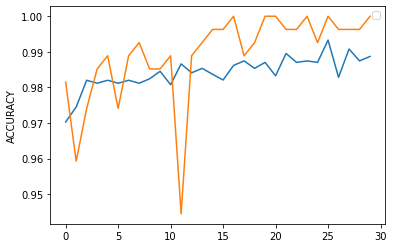

In [ ]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

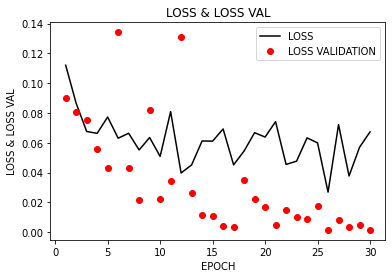

In [ ]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

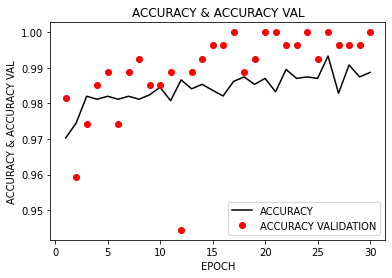

In [ ]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

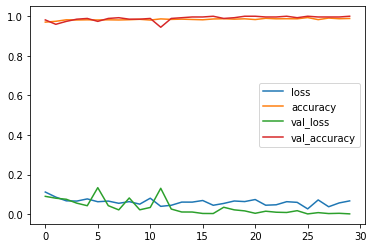

In [ ]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [ ]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0827
ACCURACY:  0.98


#### PREDICTION PROCESS

In [ ]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [ ]:
print(Main_Data_Prediction.head())

                                                JPG
0  ../content/drive/MyDrive/archive/pred/pred36.jpg
1  ../content/drive/MyDrive/archive/pred/pred17.jpg
2  ../content/drive/MyDrive/archive/pred/pred41.jpg
3  ../content/drive/MyDrive/archive/pred/pred14.jpg
4  ../content/drive/MyDrive/archive/pred/pred28.jpg


In [ ]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [ ]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [ ]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

3/3 [==============================] - 17s 8s/step


In [ ]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [ ]:
print(Model_Test_Prediction)

[0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1]


In [ ]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO']


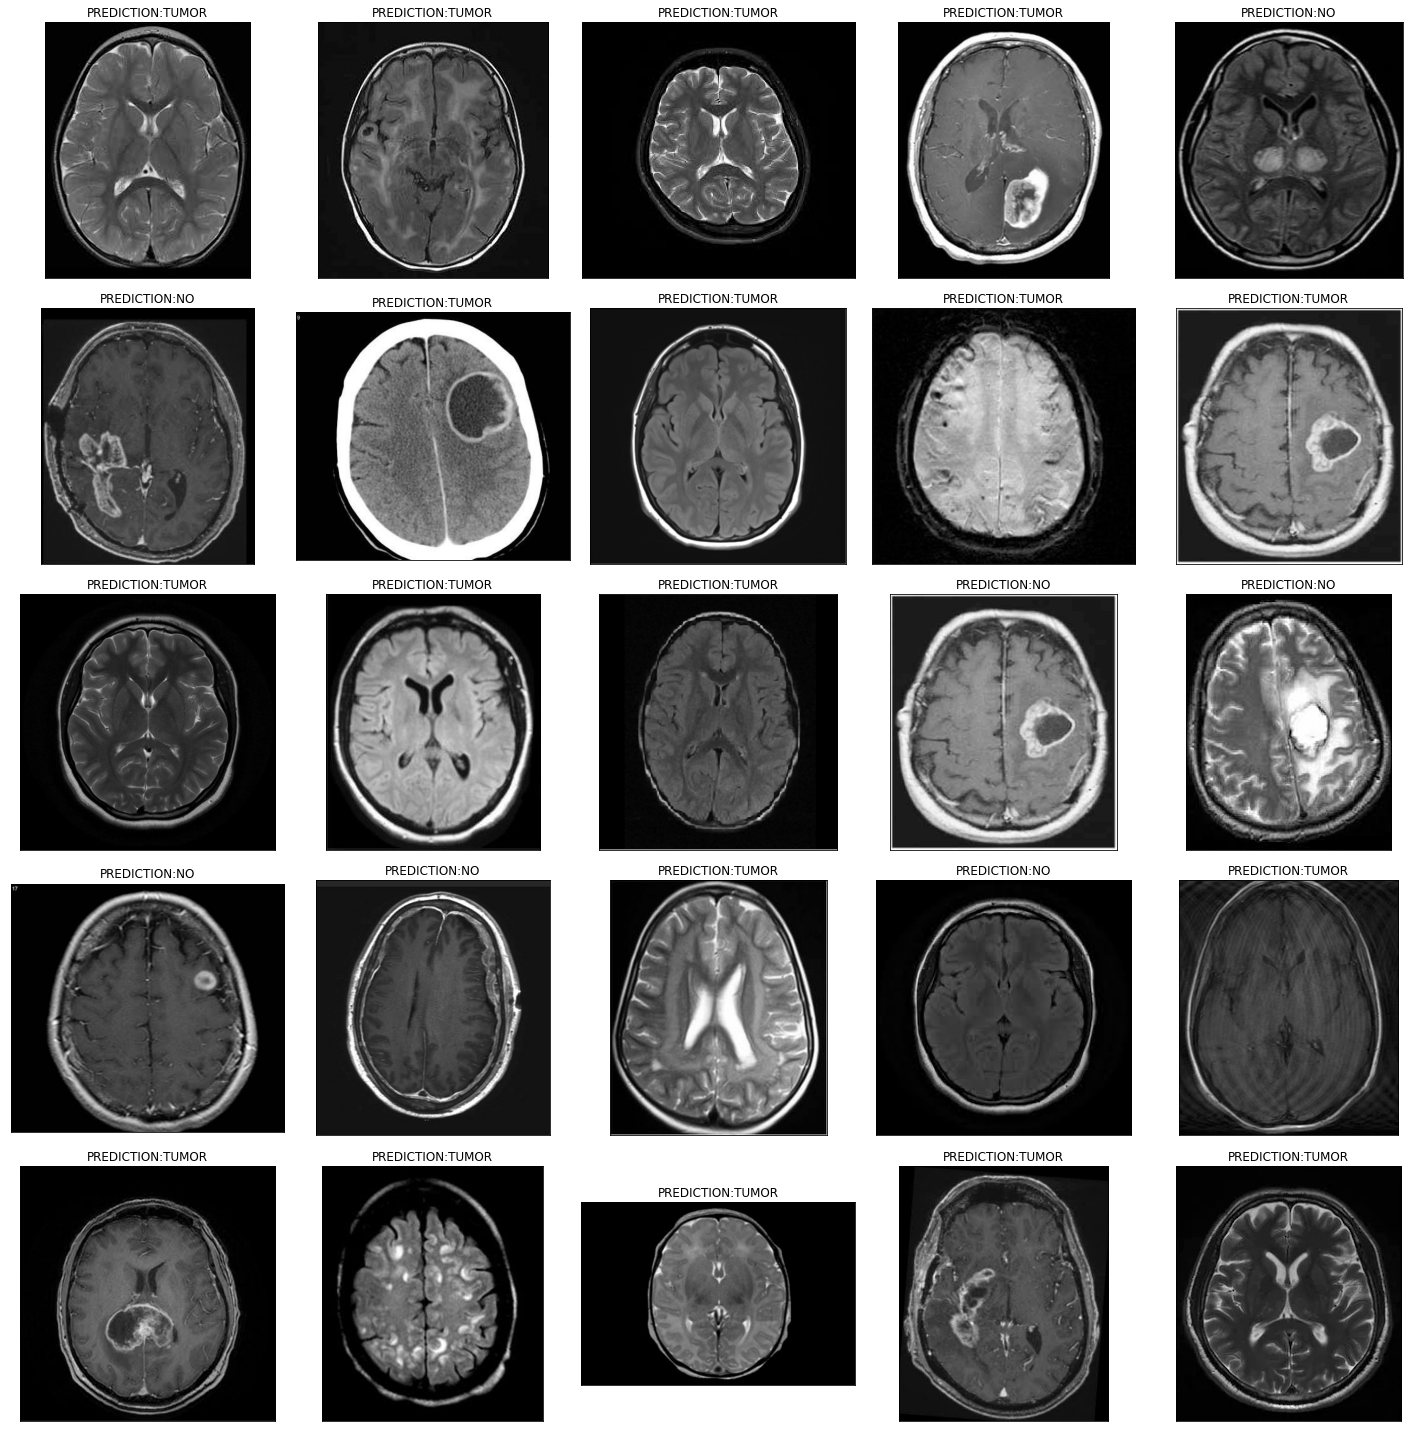

In [ ]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

# IMAGE DATA GENERATOR WITH DIVERSIFICATION

In [ ]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [ ]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [ ]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [ ]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


# CNN MODEL WITH DIVERSIFICATION

#### MODEL STRUCTURE

In [ ]:
'''Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))'''

'Model_Two = Sequential()\n\nModel_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))\nModel_Two.add(MaxPool2D((2,2)))\n#\nModel_Two.add(Conv2D(64,(3,3),activation="relu"))\nModel_Two.add(MaxPool2D((2,2)))\n#\nModel_Two.add(Conv2D(128,(3,3),activation="relu"))\nModel_Two.add(MaxPool2D((2,2)))\n#\nModel_Two.add(Conv2D(128,(3,3),activation="relu"))\nModel_Two.add(MaxPool2D((2,2)))\n#\nModel_Two.add(Conv2D(256,(3,3),activation="relu"))\nModel_Two.add(MaxPool2D((2,2)))\n#\nModel_Two.add(Flatten())\nModel_Two.add(Dropout(0.5))\nModel_Two.add(Dense(512,activation="relu"))\nModel_Two.add(Dense(2,activation="softmax"))'

In [ ]:
with tf.device("/gpu:0"):
        def gsmodel(unit, learning_rate):
                mymodel = Sequential()

                pretrained_model= tf.keras.applications.VGG19(
                    include_top=True,
                    weights="imagenet",
                    input_tensor=None,
                    input_shape=None,
                    pooling=None,
                    classes=1000,
                    classifier_activation="softmax",)

                for layer in pretrained_model.layers:
                        layer.trainable=False

                mymodel.add(pretrained_model)
                mymodel.add(Flatten())
                mymodel.add(Dense(512, activation='relu'))
                mymodel.add(Dense(1, activation='sigmoid'))
                mymodel.summary()
                mymodel.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
                return mymodel


In [ ]:
with tf.device("/gpu:0"):
        def gsmodel(unit, learning_rate):
                mymodel = Sequential()

                pretrained_model= tf.keras.applications.ResNet152V2(
                    include_top=True,
                    weights="imagenet",
                    input_tensor=None,
                    input_shape=None,
                    pooling=None,
                    classes=1000,
                    classifier_activation="softmax",)

                for layer in pretrained_model.layers:
                        layer.trainable=False

                mymodel.add(pretrained_model)
                mymodel.add(Flatten())
                mymodel.add(Dense(512, activation='relu'))
                mymodel.add(Dense(1, activation='sigmoid'))
                mymodel.summary()
                mymodel.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
                return mymodel



In [ ]:
with tf.device("/gpu:0"):
        def gsmodel(unit, learning_rate):
                mymodel = Sequential()

                pretrained_model= tf.keras.applications.InceptionResNetV2(
                    include_top=True,
                    weights="imagenet",
                    input_tensor=None,
                    input_shape=None,
                    pooling=None,
                    classes=1000,
                    classifier_activation="softmax",)

                for layer in pretrained_model.layers:
                        layer.trainable=False

                mymodel.add(pretrained_model)
                mymodel.add(Flatten())
                mymodel.add(Dense(512, activation='relu'))
                mymodel.add(Dense(1, activation='sigmoid'))
                mymodel.summary()
                mymodel.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
                return mymodel


#### MODEL COMPILE

In [ ]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#### MODEL FITTING

In [ ]:
ANN_Model = Model.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=50)

Epoch 1/50
122/122 [==============================] - 22s 177ms/step - loss: 0.7268 - accuracy: 0.5872 - val_loss: 0.6312 - val_accuracy: 0.6407
Epoch 2/50
122/122 [==============================] - 23s 185ms/step - loss: 0.6057 - accuracy: 0.6708 - val_loss: 0.5779 - val_accuracy: 0.7111
Epoch 3/50
122/122 [==============================] - 28s 229ms/step - loss: 0.5877 - accuracy: 0.7070 - val_loss: 0.5789 - val_accuracy: 0.6815
Epoch 4/50
122/122 [==============================] - 21s 175ms/step - loss: 0.5658 - accuracy: 0.7206 - val_loss: 0.5760 - val_accuracy: 0.7556
Epoch 5/50
122/122 [==============================] - 20s 165ms/step - loss: 0.5558 - accuracy: 0.7239 - val_loss: 0.5404 - val_accuracy: 0.7148
Epoch 6/50
122/122 [==============================] - 24s 198ms/step - loss: 0.5553 - accuracy: 0.7370 - val_loss: 0.5079 - val_accuracy: 0.7407
Epoch 7/50
122/122 [==============================] - 21s 170ms/step - loss: 0.5378 - accuracy: 0.7428 - val_loss: 0.5035 - val_ac

#### MODEL SUMMARY

In [ ]:
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 98, 98, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 98, 98, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 64)       

#### CHECKING MODEL WITH GRAPHIC

In [ ]:
HistoryDict_Two = ANN_Model.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

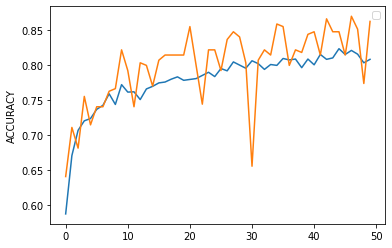

In [ ]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

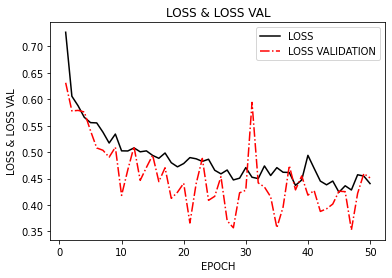

In [ ]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

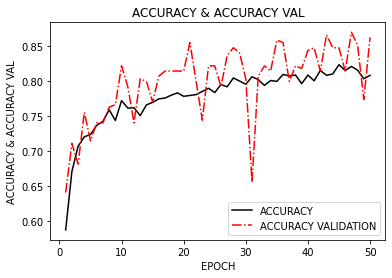

In [ ]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

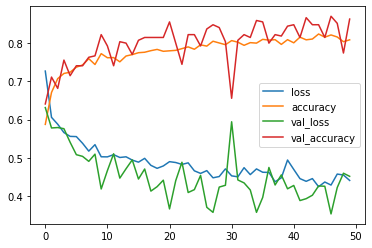

In [ ]:
Dict_Summary_Two = pd.DataFrame(ANN_Model.history)
Dict_Summary_Two.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [ ]:
Model_Results_Two = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

LOSS:  0.3279
ACCURACY:  0.89


#### PREDICTION PROCESS

In [ ]:
Model_Test_Prediction_Two = Model.predict(Test_Set_Div)

3/3 [==============================] - 1s 142ms/step


In [ ]:
Model_Test_Prediction_Two = Model_Test_Prediction_Two.argmax(axis=-1)

In [ ]:
print(Model_Test_Prediction_Two)

[1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0]


In [ ]:
Last_Prediction_Two = []
[Last_Prediction_Two.append('NO') if i == 1 else Last_Prediction_Two.append('TUMOR') for i in Model_Test_Prediction_Two]
print(Last_Prediction_Two)

['NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR']


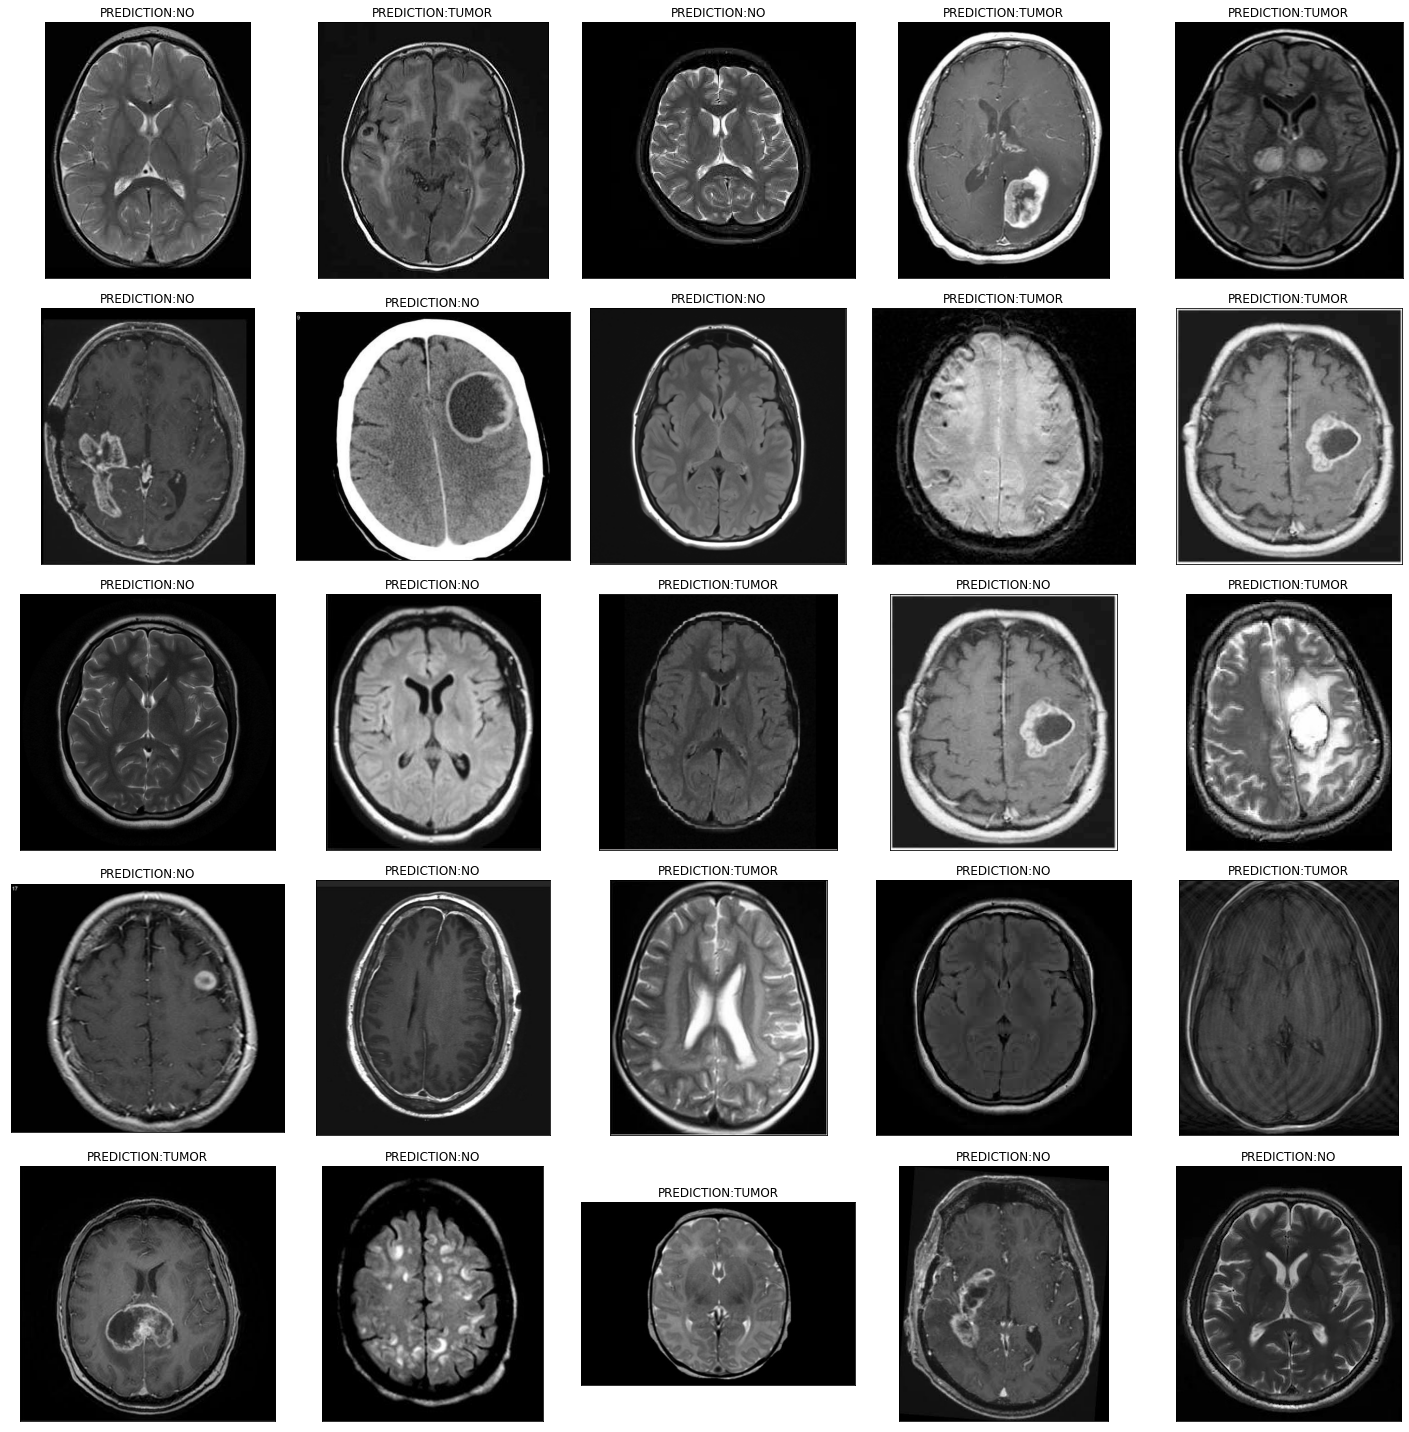

In [ ]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction_Two[i]}")
plt.tight_layout()
plt.show()